# técnicas auxiliares de proceso de imagen

## utilidades

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow, subplot, title, plot

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread("../images/"+file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def gray2float(x):
    return x.astype(float) #/ 255

def imshowg(x):
    imshow(x, 'gray')

## inpainting

Artículo de [wikipedia](https://en.wikipedia.org/wiki/Inpainting).

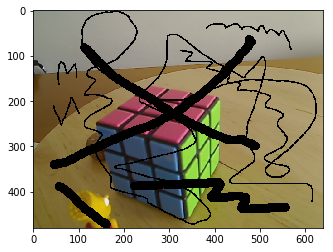

In [2]:
img = readrgb('cube4b.png')
imshow(img);

Intentamos recuperar las zonas negras. Para ello construimos la máscara de posiciones RGB=0,0,0 en las que debe actuar el algoritmo de inpainting. (Las sacamos de la propia imagen, pero en otros casos puede venir dada externamente.)

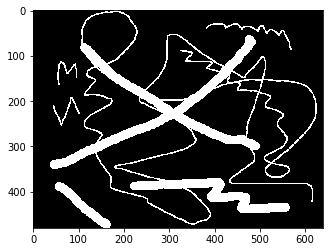

In [3]:
mask = (np.sum(img==0,axis=2) == 3)
imshow(mask,'gray');

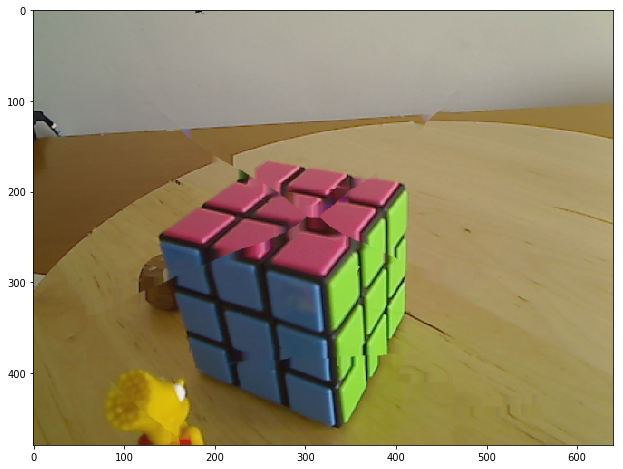

In [4]:
# la función de inpainting trabaja con mask numérica (no lógica), y además de tipo uint8 (!)
dst = cv.inpaint(img,mask.astype(np.uint8),1,cv.INPAINT_NS)
fig(12,8)
imshow(dst);

**Ejercicio**: Eliminación del logotipo de las cadenas de televisión.